Maria Laskowska 16-5-25

# Example Dashboard

### Grouped bar chart with labels
This example shows a how to create a grouped bar chart and how to annotate bars with labels.

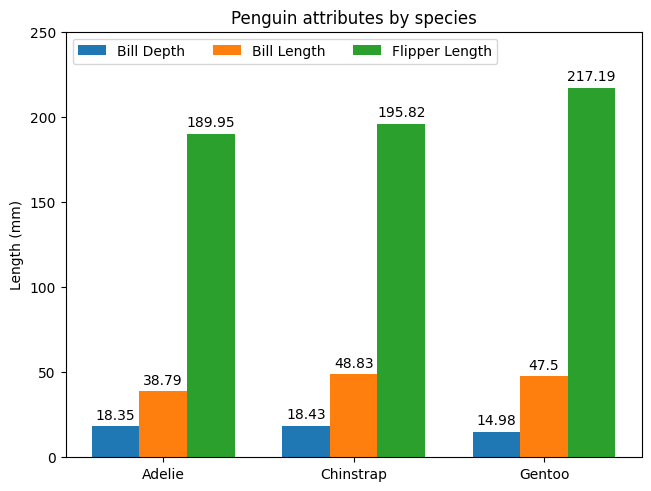

In [1]:
# data from https://allisonhorst.github.io/palmerpenguins/

import matplotlib.pyplot as plt
import numpy as np

species = ("Adelie", "Chinstrap", "Gentoo")
penguin_means = {
    'Bill Depth': (18.35, 18.43, 14.98),
    'Bill Length': (38.79, 48.83, 47.50),
    'Flipper Length': (189.95, 195.82, 217.19),
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Length (mm)')
ax.set_title('Penguin attributes by species')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 250)

plt.show()

### Discrete distribution as horizontal bar chart
Stacked bar charts can be used to visualize discrete distributions.

This example visualizes the result of a survey in which people could rate their agreement to questions on a five-element scale.

The horizontal stacking is achieved by calling barh() for each category and passing the starting point as the cumulative sum of the already drawn bars via the parameter left.

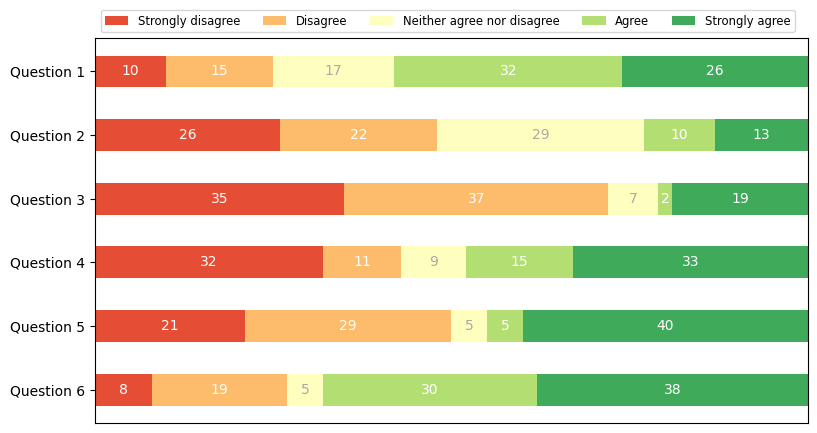

In [2]:
import matplotlib.pyplot as plt
import numpy as np

category_names = ['Strongly disagree', 'Disagree',
                  'Neither agree nor disagree', 'Agree', 'Strongly agree']
results = {
    'Question 1': [10, 15, 17, 32, 26],
    'Question 2': [26, 22, 29, 10, 13],
    'Question 3': [35, 37, 7, 2, 19],
    'Question 4': [32, 11, 9, 15, 33],
    'Question 5': [21, 29, 5, 5, 40],
    'Question 6': [8, 19, 5, 30, 38]
}


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.colormaps['RdYlGn'](
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncols=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


survey(results, category_names)
plt.show()

###Scatter Demo2
Demo of scatter plot with varying marker colors and sizes.

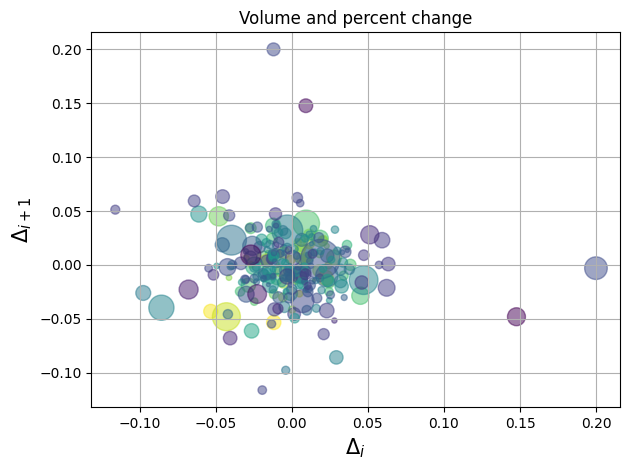

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.cbook as cbook

# Load a numpy record array from yahoo csv data with fields date, open, high,
# low, close, volume, adj_close from the mpl-data/sample_data directory. The
# record array stores the date as an np.datetime64 with a day unit ('D') in
# the date column.
price_data = cbook.get_sample_data('goog.npz')['price_data']
price_data = price_data[-250:]  # get the most recent 250 trading days

delta1 = np.diff(price_data["adj_close"]) / price_data["adj_close"][:-1]

# Marker size in units of points^2
volume = (15 * price_data["volume"][:-2] / price_data["volume"][0])**2
close = 0.003 * price_data["close"][:-2] / 0.003 * price_data["open"][:-2]

fig, ax = plt.subplots()
ax.scatter(delta1[:-1], delta1[1:], c=close, s=volume, alpha=0.5)

ax.set_xlabel(r'$\Delta_i$', fontsize=15)
ax.set_ylabel(r'$\Delta_{i+1}$', fontsize=15)
ax.set_title('Volume and percent change')

ax.grid(True)
fig.tight_layout()

plt.show()